In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from geopy.distance import geodesic
from datetime import datetime, timedelta
import folium
from folium import Popup
from folium.plugins import HeatMap
import seaborn as sns

In [114]:
# Load the datasets from JSON files
user_data = pd.read_json('user_data.json')
landlord_data = pd.read_json('landlord_data.json')
history_data = pd.read_json('history_data.json')
private_parking_data = pd.read_json('private_parking.json')
public_parking_data = pd.read_json('public_parking.json')

# Show the first few rows to verify the data
print(user_data.head())
print(landlord_data.head())
print(history_data.head())
print(private_parking_data.head())
print(public_parking_data.head())


    user_id              name       username  password license_plate_number  \
0  UID76467       Leon Wagner     lwagner839  4R9xQhHE           FR DD 6936   
1  UID33893  Sophia Schneider  sschneider336  YHcB5QKf           FR WQ 3250   
2  UID58656        Lukas Koch       lkoch282  6Eh1yR2M           FR EY 6030   
3  UID70301    Sophia Fischer    sfischer464  ZP7N5bux           FR JV 1230   
4  UID59752      Max Hoffmann   mhoffmann783  EoxXC4A9           FR YH 6477   

   credits                      email     phone_number  \
0   426.12        lwagner839@mail.com  +49 156 8363239   
1    90.71  sschneider336@webmail.org  +49 157 7993206   
2   158.48       lkoch282@example.com  +49 156 9900101   
3   212.78    sfischer464@service.net  +49 157 8032407   
4   105.39      mhoffmann783@mail.com  +49 153 2364259   

                        address  
0         46 Bergstr., Mannheim  
1       91 Ringstr., Heidelberg  
2        35 Mozartweg, Freiburg  
3  61 Berliner Allee, Stuttgart  
4     

In [115]:
# Check general information for each dataframe
print(user_data.info())
print(landlord_data.info())
print(history_data.info())
print(private_parking_data.info())
print(public_parking_data.info())

# Check basic statistics for numerical columns
print(user_data.describe())
print(landlord_data.describe())
print(history_data.describe())
print(private_parking_data.describe())
print(public_parking_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               80000 non-null  object 
 1   name                  80000 non-null  object 
 2   username              80000 non-null  object 
 3   password              80000 non-null  object 
 4   license_plate_number  80000 non-null  object 
 5   credits               80000 non-null  float64
 6   email                 80000 non-null  object 
 7   phone_number          80000 non-null  object 
 8   address               80000 non-null  object 
dtypes: float64(1), object(8)
memory usage: 5.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   landlord_id   5000 non-null   object
 1   name          5000 non-null   object


In [116]:
# Check for missing values
print(user_data.isnull().sum())
print(landlord_data.isnull().sum())
print(history_data.isnull().sum())
print(private_parking_data.isnull().sum())
print(public_parking_data.isnull().sum())

# Check for duplicates
print(user_data.duplicated().sum())
print(landlord_data.duplicated().sum())
print(history_data.duplicated().sum())
print(private_parking_data.duplicated().sum())
print(public_parking_data.duplicated().sum())


user_id                 0
name                    0
username                0
password                0
license_plate_number    0
credits                 0
email                   0
phone_number            0
address                 0
dtype: int64
landlord_id     0
name            0
username        0
password        0
phone_number    0
availability    0
dtype: int64
history_id           0
rating               0
review_text          0
user_id              0
parking_id           0
parking_latitude     0
parking_longitude    0
booking_latitude     0
booking_longitude    0
distance             0
datetime             0
dtype: int64
private_id         0
name               0
address            0
latitude           0
longitude          0
price_per_hour     0
capacity           0
available_space    0
special_access     0
landlord_id        0
opening_time       0
city               0
note_area          0
key_access_info    0
dtype: int64
public_id          0
name               0
address          

In [117]:
# Merge the history data with user data to analyze booking behavior
user_history = pd.merge(history_data, user_data, on='user_id')

# Count how many times each user has booked a parking space
user_booking_counts = user_history.groupby('user_id').size().reset_index(name='booking_count')
print(user_booking_counts.head())

# Explore the average rating per user
avg_ratings_per_user = user_history.groupby('user_id')['rating'].mean().reset_index(name='average_rating')
print(avg_ratings_per_user.head())


    user_id  booking_count
0  UID10000              1
1  UID10001              1
2  UID10002              2
3  UID10009              1
4  UID10012              4
    user_id  average_rating
0  UID10000             2.0
1  UID10001             5.0
2  UID10002             5.0
3  UID10009             3.0
4  UID10012             3.0


In [118]:
# Check the number of private and public parking spaces
private_parking_count = private_parking_data.shape[0]
public_parking_count = public_parking_data.shape[0]
print(f"Private parking spaces: {private_parking_count}")
print(f"Public parking spaces: {public_parking_count}")

# Explore the total capacity of private and public parking spaces
total_private_capacity = private_parking_data['capacity'].sum()
total_public_capacity = public_parking_data['capacity'].sum()
print(f"Total private parking capacity: {total_private_capacity}")
print(f"Total public parking capacity: {total_public_capacity}")

# Explore the total available space of private and public parking spaces
total_private_available_space = private_parking_data['available_space'].sum()
total_public_available_space = public_parking_data['available_space'].sum()
print(f"Total private parking available_space: {total_private_available_space}")
print(f"Total public parking available_space: {total_public_available_space}")


Private parking spaces: 10000
Public parking spaces: 2533
Total private parking capacity: 74877
Total public parking capacity: 217297
Total private parking available_space: 30020
Total public parking available_space: 115729


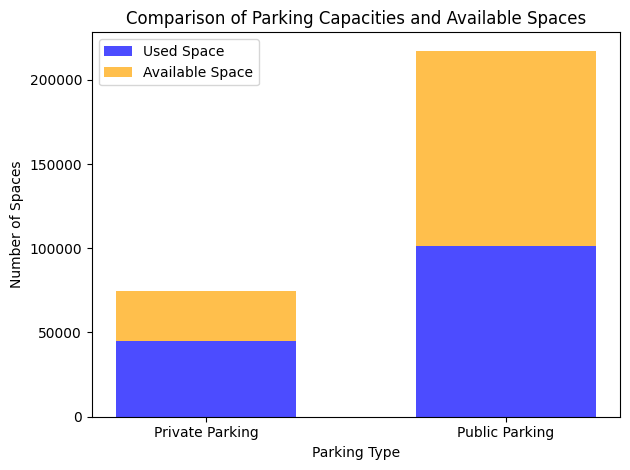

In [119]:
# Labels and values
categories = ['Private Parking', 'Public Parking']
capacity = [total_private_capacity, total_public_capacity]
available_space = [total_private_available_space, total_public_available_space]
used_space = [c - a for c, a in zip(capacity, available_space)]  # Calculate used space

# Bar positions
x = np.arange(len(categories))

# Plot stacked bars
plt.bar(x, used_space, width=0.6, label='Used Space', color='blue', alpha=0.7)
plt.bar(x, available_space, width=0.6, label='Available Space', color='orange', alpha=0.7, bottom=used_space)

# Add labels and title
plt.xlabel('Parking Type')
plt.ylabel('Number of Spaces')
plt.title('Comparison of Parking Capacities and Available Spaces')
plt.xticks(x, categories)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

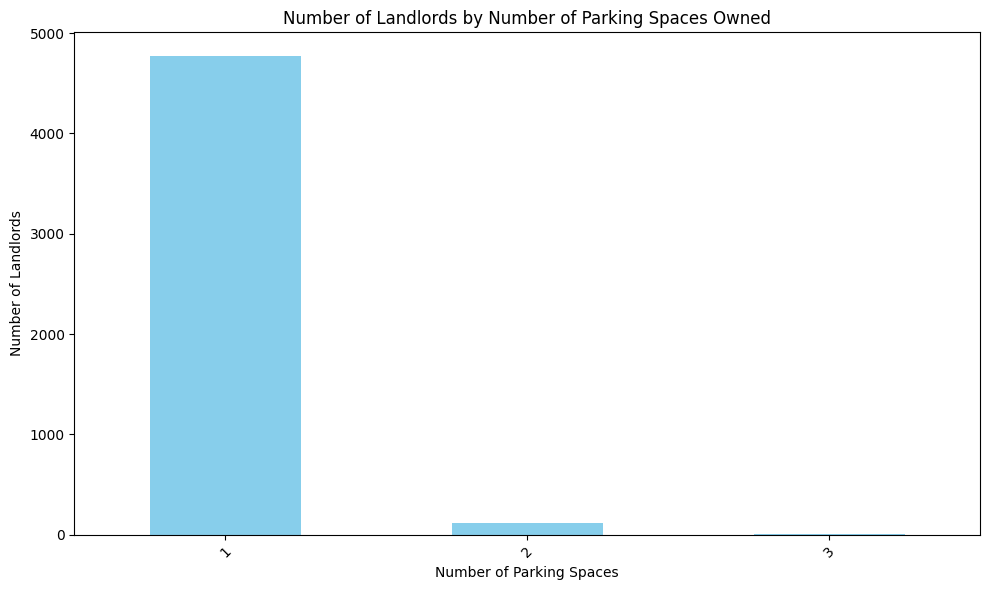

In [ ]:
# Group by the number of parking spaces per landlord and count the number of landlords
landlords_by_parking_spaces = landlord_data.groupby('landlord_id').size().value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
landlords_by_parking_spaces.sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Landlords by Number of Parking Spaces Owned')
plt.xlabel('Number of Parking Spaces')
plt.ylabel('Number of Landlords')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


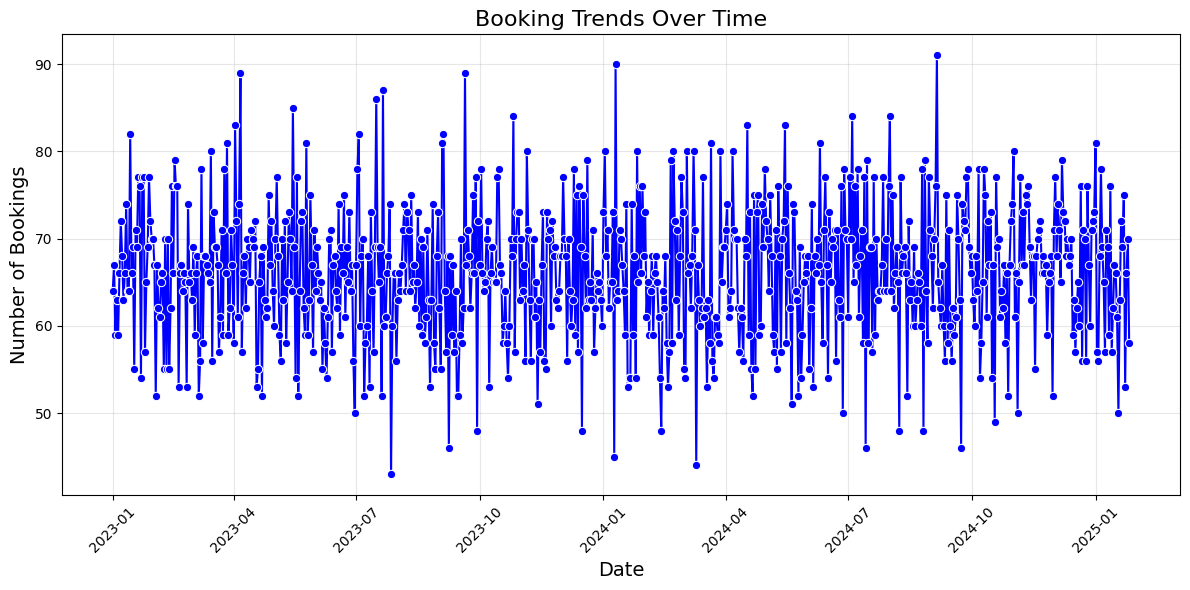

In [122]:
daily_bookings = history_data.groupby(history_data['datetime'].dt.date).size()

# Convert the result to a DataFrame for better manipulation
daily_bookings = daily_bookings.reset_index(name='num_bookings')
daily_bookings.rename(columns={'datetime': 'date'}, inplace=True)

# Plotting the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_bookings, x='date', y='num_bookings', marker='o', color='b')

# Customize the plot
plt.title('Booking Trends Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

In [123]:
# Merge the private parking data with landlord data
private_parking_landlord = pd.merge(private_parking_data, landlord_data, on='landlord_id')

# Count the number of parking spaces each landlord manages
landlord_parking_count = private_parking_landlord.groupby('landlord_id')['private_id'].count().reset_index(name='parking_count')
print(landlord_parking_count.head())

# Count the number of private parking spaces per landlord
landlord_parking_capacity = private_parking_landlord.groupby('landlord_id')['capacity'].sum().reset_index(name='total_capacity')
print(landlord_parking_capacity.head())


  landlord_id  parking_count
0    LID10030              2
1    LID10032              1
2    LID10080              4
3    LID10088              3
4    LID10103              6
  landlord_id  total_capacity
0    LID10030              15
1    LID10032               5
2    LID10080              35
3    LID10088              22
4    LID10103              45


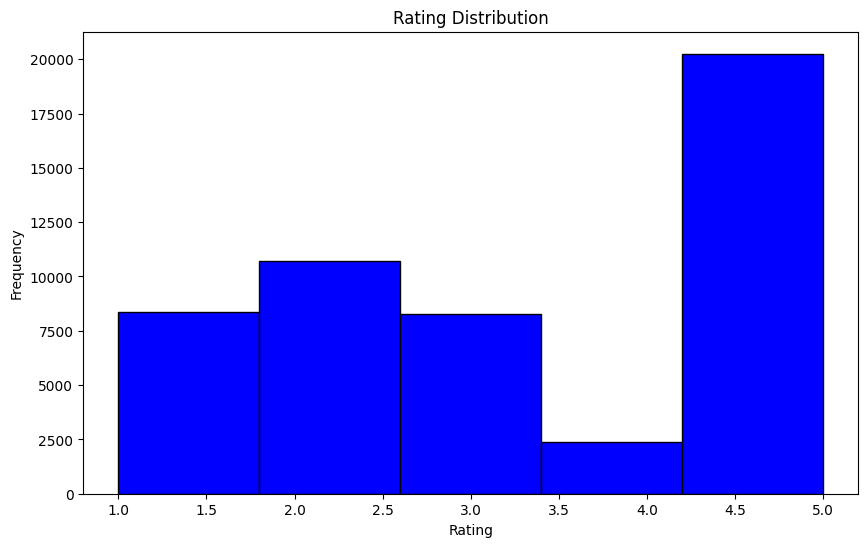

In [124]:
# Plot the rating distribution from the history data
plt.figure(figsize=(10, 6))
plt.hist(history_data['rating'], bins=5, color='blue', edgecolor='black')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [125]:
# Convert the 'datetime' column to pandas datetime format
history_data['datetime'] = pd.to_datetime(history_data['datetime'])

# Get today's date and the date 30 days ago
time_range = datetime.now() - timedelta(days=1)

# Filter the history_data to include only the rows from the last 30 days
history_data_recent = history_data[history_data['datetime'] >= time_range]

# Function to calculate the distance between two points (latitude, longitude)
def calculate_distance(row):
    try:
        parking_location = (row['parking_latitude'], row['parking_longitude'])
        booking_location = (row['booking_latitude'], row['booking_longitude'])
        return geodesic(parking_location, booking_location).km
    except Exception as e:
        print(f"Error calculating distance for row: {row}, Error: {e}")
        return np.nan  # Return NaN for problematic rows

# Recalculate the distance for each booking in the filtered data (recent 30 days)
history_data_recent = history_data_recent.dropna(
    subset=['parking_latitude', 'parking_longitude', 'booking_latitude', 'booking_longitude']
)

In [126]:
print(history_data_recent[['booking_latitude', 'booking_longitude']].head())
print(history_data_recent[['booking_latitude', 'booking_longitude']].isna().sum())


      booking_latitude  booking_longitude
598           48.88364            9.26110
888           47.82576            9.83091
1256          48.73844            7.95771
1377          49.67756            8.61259
1515          48.18867            8.15615
booking_latitude     0
booking_longitude    0
dtype: int64


In [127]:
map_center = [history_data_recent['booking_latitude'].mean(), history_data_recent['booking_longitude'].mean()]
print(f"Map Center: {map_center}")

Map Center: [np.float64(48.543175161290335), np.float64(9.000979354838712)]


In [128]:
# Create a base map centered on the average booking coordinates from the recent 30 days
m = folium.Map(location=map_center, zoom_start=10)

In [129]:
# Add markers and lines to the map for the recent 30 days data
for _, row in history_data_recent.iterrows():
    parking_location = (row['parking_latitude'], row['parking_longitude'])

    booking_location = (row['booking_latitude'], row['booking_longitude'])
    time_booked = row['datetime']  
    rating = row['rating']
    review_text = row['review_text']


    popup_content = f"""
    <b>Booking Location:</b> {booking_location}<br>
    <b>Rating:</b> {rating}<br>
    <b>Review:</b> {review_text}<br>
    <b>Time Booked:</b> {time_booked}
    """
    
    # Add a marker for the parking location
    folium.Marker(
        parking_location,
        popup=Popup(f"Parking Location: {parking_location}", parse_html=True),
        icon=folium.Icon(color='blue', icon='car', prefix='fa')
    ).add_to(m)
    
    # Add a marker for the booking location
    folium.Marker(
        booking_location,
        popup=Popup(popup_content, parse_html=True),
        icon=folium.Icon(color='green', icon='home', prefix='fa')
    ).add_to(m)
    
    # Draw a line between the parking and booking locations
    folium.PolyLine(
        [parking_location, booking_location],
        color="red",
        weight=2.5,
        opacity=0.8,
        tooltip=f"Distance: {row['calculated_distance']:.2f} km"
    ).add_to(m)

# Save the map to an HTML file or display it
m.save('map_visualization_recent_days.html')
m





KeyError: 'calculated_distance'

In [ ]:
# Create a map centered around a midpoint (average latitude and longitude of parking locations)
map_center = [private_parking_data['latitude'].mean(), private_parking_data['longitude'].mean()]
parking_map = folium.Map(location=map_center, zoom_start=13)

# Combine private and public parking data for the heatmap
combined_parking_data = pd.concat([private_parking_data[['latitude', 'longitude']], 
                                   public_parking_data[['latitude', 'longitude']]], ignore_index=True)

# Add a heatmap layer
HeatMap(combined_parking_data).add_to(parking_map)

# Display the map
parking_map


In [ ]:
# Convert datetime to pandas datetime format if it's not already
history_data['datetime'] = pd.to_datetime(history_data['datetime'])

# Extract hour of booking
history_data['hour_of_day'] = history_data['datetime'].dt.hour

# Group by hour of the day and count bookings
booking_by_hour = history_data.groupby('hour_of_day').size()

# Plot the booking count by hour
plt.figure(figsize=(10, 6))
booking_by_hour.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Bookings by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Extract the day of the week from datetime (0 = Monday, 6 = Sunday)
history_data['day_of_week'] = history_data['datetime'].dt.dayofweek

# Group by day of the week and count bookings
booking_by_day = history_data.groupby('day_of_week').size()

# Plot the booking count by day of the week
plt.figure(figsize=(10, 6))
booking_by_day.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Number of Bookings by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Bookings')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.show()


In [ ]:
# Calculate occupancy percentage for private and public parking
private_parking_data['occupancy'] = 1 - (private_parking_data['available_space'] / private_parking_data['capacity'])
public_parking_data['occupancy'] = 1 - (public_parking_data['available_space'] / public_parking_data['capacity'])

# Plot stacked bar chart for occupancy
fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(['Private Parking', 'Public Parking'], 
        [private_parking_data['occupancy'].mean(), public_parking_data['occupancy'].mean()],
        color='red', alpha=0.7, label='Occupied')

ax.barh(['Private Parking', 'Public Parking'], 
        [1 - private_parking_data['occupancy'].mean(), 1 - public_parking_data['occupancy'].mean()],
        color='green', alpha=0.7, label='Available')

ax.set_xlabel('Occupancy Percentage')
ax.set_title('Parking Availability vs. Occupancy')
ax.legend()
plt.show()


In [ ]:
# Merge the history data with private and public parking data
history_private_parking = pd.merge(history_data, private_parking_data, left_on='parking_id', right_on='private_id', how='left')
history_public_parking = pd.merge(history_data, public_parking_data, left_on='parking_id', right_on='public_id', how='left')

# Plot the ratings comparison for private vs public parking
plt.figure(figsize=(10, 6))

# Plot ratings for private parking
plt.hist(history_private_parking['rating'], bins=5, alpha=0.5, label='Private Parking', color='orange', edgecolor='black')

# Plot ratings for public parking
plt.hist(history_public_parking['rating'], bins=5, alpha=0.5, label='Public Parking', color='blue', edgecolor='black')

plt.title('Ratings Comparison: Private vs Public Parking')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()
